In [ ]:


# Import necessary libraries
import nltk

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

# set plot style
sns.set_theme()



In [ ]:
nltk.download(['punkt','stopwords'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
# Get the list of English stop words
stopwords_list = stopwords.words('english')
print(stopwords_list)



['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
# Read the MBTI dataset
mbti = pd.read_csv('https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Data/classification_sprint/mbti_train.csv')
mbti.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [ ]:
# Print list of unique MBTI personality types
type_labels = list(mbti.type.unique())
print(type_labels)

['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP', 'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ']


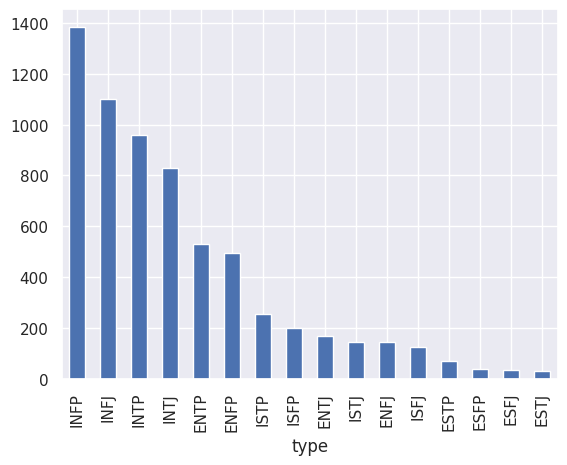

In [ ]:
mbti['type'].value_counts().plot(kind = 'bar')
plt.show()

In [ ]:
# Separate each post in the 'posts' column into its own row
all_mbti = []
for i, row in mbti.iterrows():
    for post in row['posts'].split('|||'):
        all_mbti.append([row['type'], post])
all_mbti = pd.DataFrame(all_mbti, columns=['type', 'post'])

In [ ]:
all_mbti.shape

(316548, 2)

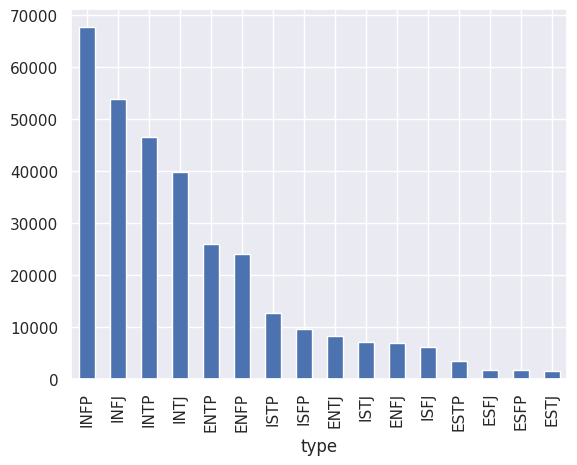

In [ ]:
all_mbti['type'].value_counts().plot(kind = 'bar')
plt.show()

In [ ]:
# Text cleaning
# Removing noise

In [ ]:
# Replace URLs in the 'post' column with a placeholder string
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
all_mbti['post'] = all_mbti['post'].replace(to_replace = pattern_url, value = subs_url, regex = True)

**For the MBTI dataset, we will be doing the following:**

*   Remove the web-urls.
*   Make all the text lowercase.
*   Remove punctuation



In [ ]:
all_mbti.head()

,type,post
0,INFJ,'url-web
1,INFJ,url-web
2,INFJ,enfp and intj moments url-web sportscenter n...
3,INFJ,What has been the most life-changing experienc...
4,INFJ,url-web url-web On repeat for most of today.


In [ ]:
#First we make all the text lowercase to remove some noise from capitalisation.
all_mbti['post'] = all_mbti['post'].str.lower()

In [ ]:
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [ ]:
def remove_punctuation(post):
    return ''.join([l for l in post if l not in string.punctuation])

In [ ]:
all_mbti['post'] = all_mbti['post'].apply(remove_punctuation)
all_mbti['post'].iloc[268558]

'just when i think i’ve lost you just when i’m so tired i toss away the fight and say “i’ll just embrace my demons then… ‘cause you feel so far away and i’ll never be your angel” —that’s when'

**Tokenisation**

In [ ]:
from nltk.tokenize import word_tokenize, TreebankWordTokenizer

In [ ]:
word_tokenize('A tokenizer divides text into a sequence of tokens, which roughly correspond to "words".')

['A',
 'tokenizer',
 'divides',
 'text',
 'into',
 'a',
 'sequence',
 'of',
 'tokens',
 ',',
 'which',
 'roughly',
 'correspond',
 'to',
 '``',
 'words',
 "''",
 '.']

In [ ]:
# Tokenise the text using the TreebankWordTokenizer (its much quicker)
tokeniser = TreebankWordTokenizer()
all_mbti['tokens'] = all_mbti['post'].apply(tokeniser.tokenize)

In [ ]:
all_mbti['tokens'].iloc[55555]

['i',
 'find',
 'all',
 'of',
 'you',
 'to',
 'be',
 'extremely',
 'humorous',
 'now',
 'to',
 'find',
 'other',
 'specimen',
 'to',
 'observe']

**Stemming**

In [ ]:
from nltk import SnowballStemmer, PorterStemmer, LancasterStemmer

In [ ]:
words = 'caring cares cared caringly carefully'

In [ ]:
# find the stem of each word in words
stemmer = SnowballStemmer('english')
for word in words.split():
    print(stemmer.stem(word))

care
care
care
care
care


In [ ]:
def mbti_stemmer(words, stemmer):
    return [stemmer.stem(word) for word in words]

In [ ]:
all_mbti['stem'] = all_mbti['tokens'].apply(mbti_stemmer, args=(stemmer, ))

In [ ]:
for i, t in enumerate(all_mbti.iloc[268702]['tokens']):
    print ('{:20s} --> {:10s}'.format(t, all_mbti.iloc[268702]['stem'][i]))

i                    --> i         
hate                 --> hate      
april                --> april     
fools                --> fool      
day                  --> day       
angry                --> angri     
theres               --> there     
a                    --> a         
site                 --> site      
im                   --> im        
regularly            --> regular   
on                   --> on        
and                  --> and       
the                  --> the       
admins               --> admin     
are                  --> are       
screwing             --> screw     
everything           --> everyth   
up                   --> up        
today                --> today     
for                  --> for       
a                    --> a         
laugh                --> laugh     
but                  --> but       
i                    --> i         
dont                 --> dont      
find                 --> find      
it                   --> it 

**Lemmatization**

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

print(lemmatizer.lemmatize("cats"))
print(lemmatizer.lemmatize("cacti"))
print(lemmatizer.lemmatize("geese"))
print(lemmatizer.lemmatize("rocks"))
print(lemmatizer.lemmatize("python"))
print(lemmatizer.lemmatize("better", pos="a"))
print(lemmatizer.lemmatize("best", pos="a"))
print(lemmatizer.lemmatize("run"))
print(lemmatizer.lemmatize("ran",'v'))



[nltk_data] Downloading package wordnet to /root/nltk_data...


cat
cactus
goose
rock
python
good
best
run
run


In [ ]:
def mbti_lemma(words, lemmatizer):
    return [lemmatizer.lemmatize(word) for word in words]

In [ ]:
all_mbti['lemma'] = all_mbti['tokens'].apply(mbti_lemma, args=(lemmatizer, ))

In [ ]:
for i, t in enumerate(all_mbti.iloc[268702]['tokens']):
    print ('{:20s} --> {:10s}'.format(t, all_mbti.iloc[268702]['lemma'][i]))

i                    --> i         
hate                 --> hate      
april                --> april     
fools                --> fool      
day                  --> day       
angry                --> angry     
theres               --> there     
a                    --> a         
site                 --> site      
im                   --> im        
regularly            --> regularly 
on                   --> on        
and                  --> and       
the                  --> the       
admins               --> admins    
are                  --> are       
screwing             --> screwing  
everything           --> everything
up                   --> up        
today                --> today     
for                  --> for       
a                    --> a         
laugh                --> laugh     
but                  --> but       
i                    --> i         
dont                 --> dont      
find                 --> find      
it                   --> it 

**Stop words**

In [ ]:
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
sorted(stopwords.words('english'))[0:10]

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an']

In [ ]:
def remove_stop_words(tokens):
    return [t for t in tokens if t not in stopwords.words('english')]

In [ ]:
all_mbti['stem'] = all_mbti['tokens'].apply(remove_stop_words)
all_mbti['stem']

0                                                  [urlweb]
1                                                  [urlweb]
2         [enfp, intj, moments, urlweb, sportscenter, to...
3                          [lifechanging, experience, life]
4                           [urlweb, urlweb, repeat, today]
                                ...                        
316543    [kallinhausin, may, rooted, problem, infps, pr...
316544    [regards, king, show, book, havent, read, book...
316545         [sunlight, bouncing, fog, dawn, serendipity]
316546                            [songs, really, powerful]
316547                     [remember, werent, trying, hurt]
Name: stem, Length: 316548, dtype: object